El proceso de regresión lineal busca minimizar el error cuadrático medio (MSE) para encontrar los valores óptimos de m y b.

y=mx+b

donde:

m es la pendiente.
b es la intersección en el eje y.


In [1]:
import numpy as np

# Generar datos sintéticos
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3.5 * X + np.random.randn(100, 1) * 0.2

# Añadir una columna de unos para el término de sesgo (b)
X_b = np.c_[np.ones((100, 1)), X]

# Calcular los coeficientes usando la fórmula de la pseudoinversa
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Obtener la pendiente (m) y el intercepto (b)
b, m = theta_best[0][0], theta_best[1][0]

print(f"Intersección (b): {b:.4f}, Pendiente (m): {m:.4f}")

# Realizar predicciones
X_new = np.array([[0], [1]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best


Intersección (b): 0.0430, Pendiente (m): 3.4080


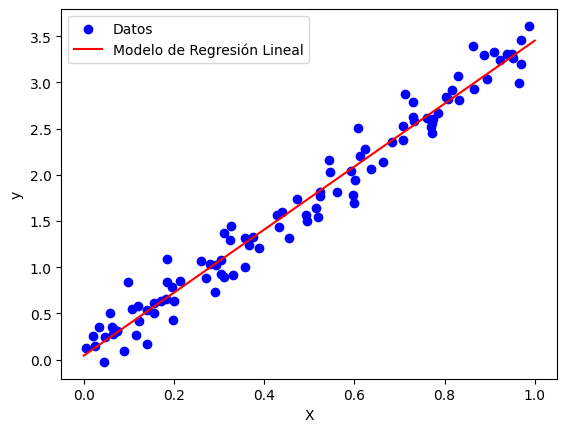

In [2]:
# Graficar los resultados
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_new, y_predict, color='red', label='Modelo de Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

- Escalado de datos: Es importante escalar los datos para SVR, ya que es sensible a las magnitudes de las características.
- Definición del modelo SVR: Utilizamos un kernel lineal para la regresión y configuramos C y epsilon, donde C controla la regularización y epsilon define el margen donde no se penalizan los errores.
- Entrenamiento: Se entrena el modelo con los datos escalados.
- Vectores de soporte: Se identifican los índices de los vectores de soporte, que son los puntos de datos que definen el margen óptimo.

Intersección (b): 1.6383, Pendiente (m): 1.0078


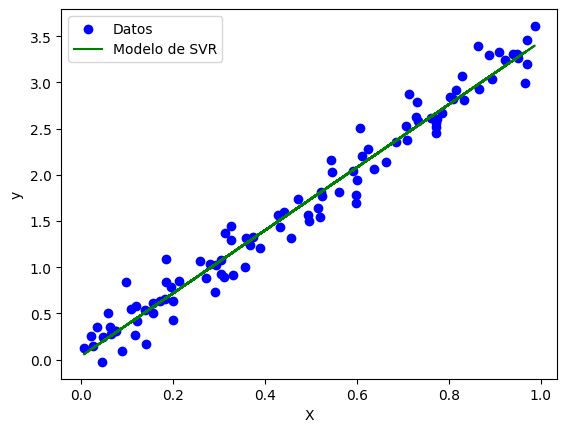

Índices de los vectores de soporte: [ 3  6  8 10 11 15 16 19 24 27 30 34 37 41 42 43 44 45 46 47 48 49 50 54
 56 58 59 60 62 63 65 66 69 70 71 73 75 76 79 80 81 82 83 84 85 86 87 88
 90 91 93 94 95 99]


In [3]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Escalar los datos para un mejor rendimiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo SVR con un kernel lineal
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Entrenar el modelo
svr_model.fit(X_scaled, y.ravel())

# Obtener los coeficientes del modelo
coef = svr_model.coef_[0]
intercept = svr_model.intercept_[0]

print(f"Intersección (b): {intercept:.4f}, Pendiente (m): {coef[0]:.4f}")

# Realizar predicciones
y_svr_pred = svr_model.predict(X_scaled)

# Graficar los resultados
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_svr_pred, color='green', label='Modelo de SVR')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Identificar los vectores de soporte
support_vectors = svr_model.support_
print(f"Índices de los vectores de soporte: {support_vectors}")
